In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, ZeroPadding2D, Dropout, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist

In [3]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [4]:
X_train, y_train = load_mnist('fashionmnist', kind='train')
X_test, y_test = load_mnist('fashionmnist', kind='t10k')

In [5]:
X_test.shape

(10000, 784)

از حالت فلت در میاریم میکنیمش همون ماتریس دو بعدی چون قراره بدیم کانولوشن اون خودش فلت میکنه

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

In [9]:
X_train.shape

(60000, 28, 28, 1)

In [10]:
X_train[1000]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 97],
        [ 84],
        [ 97],
        [110],
        [108],
        [ 87],
        [ 97],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 19],
        [255],
        [199],
        [183],
        [142],
        [161],
        [200],
        [213],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
model = Sequential([
    Input(shape=(28, 28, 1)),
    ZeroPadding2D(padding=(1, 1)),
    Conv2D(32, 3, activation='relu'),
    Dropout(0.2),
    MaxPool2D(pool_size=2, strides=2),
    ZeroPadding2D(padding=(1, 1)),
    Conv2D(64, 3, activation='relu'),
    Dropout(0.2),
    MaxPool2D(pool_size=2, strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax'),
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ zero_padding2d (ZeroPadding2D)  │ (None, 30, 30, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_1                │ (None, 16, 16, 32)     │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [15]:
history = model.fit(X_train, y_train_ohe, epochs=10, validation_data=(X_test, y_test_ohe), batch_size=300)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.7542 - loss: 0.6830 - val_accuracy: 0.8417 - val_loss: 0.4637
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.8504 - loss: 0.4187 - val_accuracy: 0.8727 - val_loss: 0.3731
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.8709 - loss: 0.3649 - val_accuracy: 0.8850 - val_loss: 0.3338
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.8811 - loss: 0.3270 - val_accuracy: 0.8921 - val_loss: 0.3162
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.8896 - loss: 0.3096 - val_accuracy: 0.8970 - val_loss: 0.2948
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.8956 - loss: 0.2921 - val_accuracy: 0.9025 - val_loss: 0.2787
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.8987 - loss: 0.2753 - val_accuracy: 0.9064 - val_loss: 0.2820
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.9034 - loss: 0.2666 - val_acc

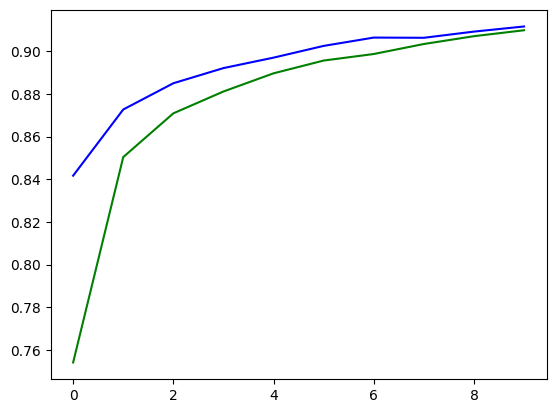

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='green', label='Train Data')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation Data')

In [17]:
model.save('ali.h5')